In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [2]:
BMSD = pd.read_csv("BigMartSalesData.csv")

In [3]:
BMSD.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


In [4]:
BMSD2011 = BMSD[BMSD['Year']==2011]

In [5]:
BMSD2011.groupby(['Month'])['Amount'].sum().reset_index()

,Month,Amount
0,1,822669.640
1,2,549134.460
2,3,752003.310
3,4,582318.451
4,5,817655.200
5,6,832231.670
6,7,757108.941
7,8,791173.020
8,9,1097467.722
9,10,1239237.260


# 1.Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

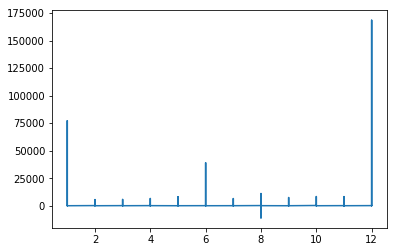

In [6]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
plt.plot(BMSD2011.Month,BMSD2011.Amount)
#for i,j in BMSD2011.Amount.items():
    #ax.annotate(str(j), xy=(i, j))

# 2. Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


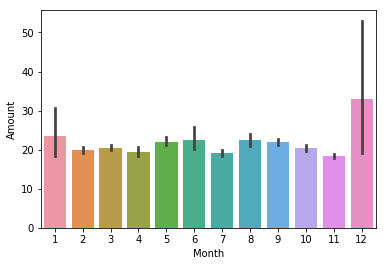

In [7]:
sns.barplot(BMSD2011.Month,BMSD2011.Amount)

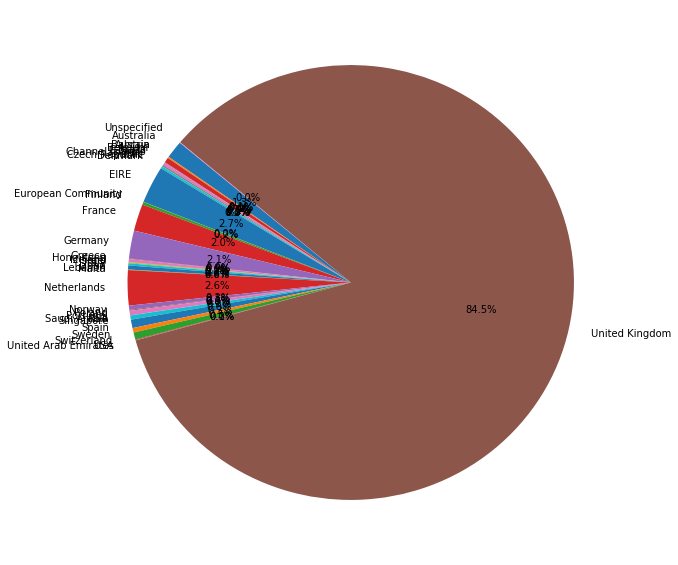

In [8]:
plt.figure(figsize=(10,10))
plt.rc("font", size=10)
y = BMSD2011.groupby(['Country'])['Amount'].sum().reset_index()
plt.pie(y.Amount, labels=y.Country, autopct='%1.1f%%', shadow=False, startangle=140)
plt.savefig('country.png')

# 3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

# 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated 

In [9]:
BMSD2011['OriginalAmount']= BMSD2011['Quantity']*BMSD2011['UnitPrice']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Amount Status')

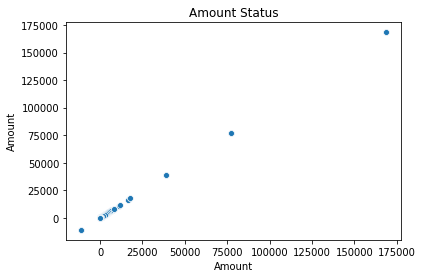

In [10]:
#sns.set()
sns.scatterplot(x=BMSD2011['Amount'],y=BMSD2011['Amount'])
#plt.scatter(BMSD2011['Month'],BMSD2011['Amount'])
plt.title('Amount Status')

# Enhancements for code

# 1. Change the bar chart to show the value of bar

In [11]:
MA = BMSD2011.groupby(['Month'])['Amount'].sum().reset_index()
MA1 = list(MA['Month'])
MA2 = list(MA['Amount'])

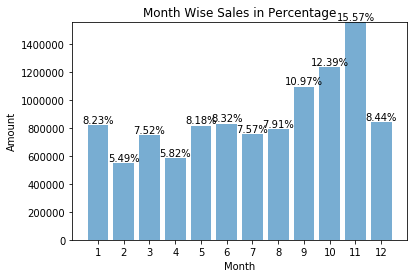

In [12]:
axes = plt.gca()
axes.set_xlim([-1,len(MA1)]) # set x-axis range
axes.set_ylim([0,max(MA2)]) # set y-axis range
x_values =  MA1
x_pos = np.arange(len(x_values))
y_values = MA2
plt.bar(x_pos, y_values, align='center', alpha=0.6)
plt.xticks(x_pos, x_values)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Month Wise Sales in Percentage')
rects = axes.patches
for rect, label in zip(rects, y_values):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2, height, str(round(label/100000, 2))+'%',ha='center', va='bottom')
# plt.show()

In [13]:
CA = BMSD2011.groupby(['Country'])['Amount'].sum().reset_index()
CA1 = list(CA['Country'])
CA2 = list(CA['Amount'])

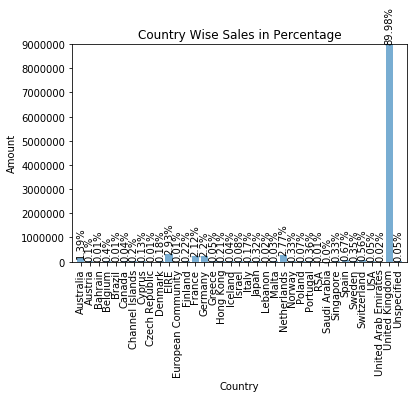

In [14]:
axes = plt.gca()
axes.set_xlim([-1,len(CA1)]) # set x-axis range
axes.set_ylim([0,max(CA2)]) # set y-axis range
x_values =  CA1
x_pos = np.arange(len(x_values))
y_values = CA2
plt.bar(x_pos, y_values, align='center', alpha=0.6,)
plt.xticks(x_pos, x_values,rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.title('Country Wise Sales in Percentage')
rects = axes.patches
for rect, label in zip(rects, y_values):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2, height, str(round(label/100000, 2))+'%',ha='center', va='bottom',rotation='vertical')
# plt.show()

# 2. In Pie Chart Play With Parameters shadow=True, startangle=90 and see how different the chart looks

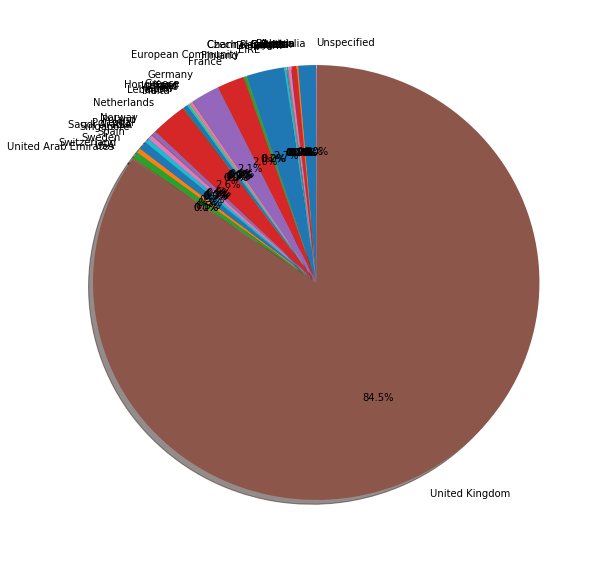

In [15]:
plt.figure(figsize=(10,10))
plt.rc("font", size=10)
y = BMSD2011.groupby(['Country'])['Amount'].sum().reset_index()
plt.pie(y.Amount, labels=y.Country, autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig('Country.png')

# 3. In scatter plot change the color of Scatter Points

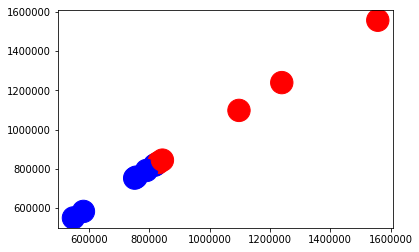

In [16]:
x = MA['Amount']
y = MA['Amount']
min1 = min(round(MA['Amount'],2))
st1 = st.median(round(MA['Amount'],2))
max1 = max(round(MA['Amount'],2))
col = np.where(x<min1,'k',np.where(y<st1,'b','r'))
plt.scatter(x, y, c=col, s=500, linewidth=1)
plt.show()